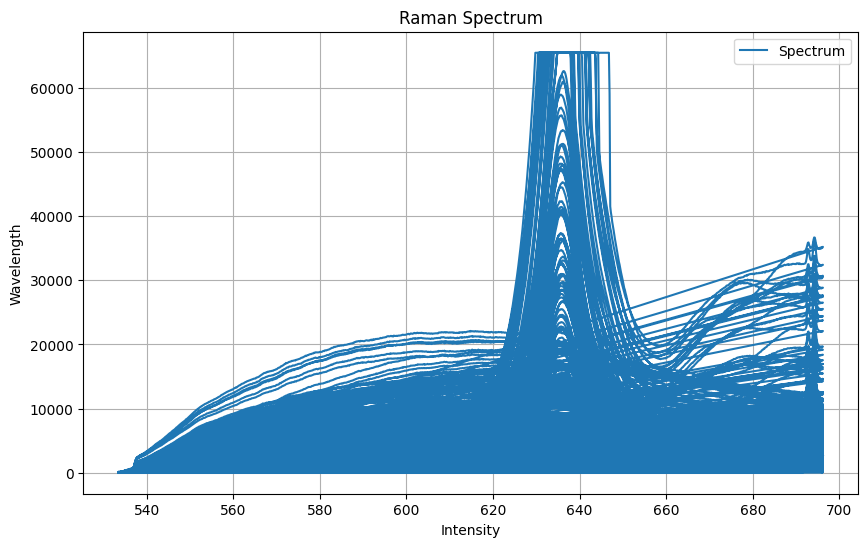

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define directory
directory = '/kaggle/input/probe-row-txt'

# 1) FIND FILES
def process_files(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.TXT'):
                file_path = os.path.join(root, file)
                # Read contents of file
                with open(file_path, 'r') as f:
                    # Clean data before converting to DataFrame
                    cleaned_lines = []
                    for line in f:
                        cleaned_line = line.strip().replace('"', '')  # remove " symbols
                        cleaned_lines.append(cleaned_line)
                    cleaned_content = '\n'.join(cleaned_lines)
                    
                df = clean_raman_data(cleaned_content)
                output_directory = '/kaggle/working/Output/cleaned_data'
                os.makedirs(output_directory, exist_ok=True)
                output_file_path = os.path.join(output_directory, file.replace('.TXT', '_cleaned.csv'))
                df.to_csv(output_file_path, index=False)

# 2) CLEAN DATA
def clean_raman_data(input_content):
    # Read content of input file
    lines = input_content.split('\n')

    # Extract only lines containing data
    data_lines = [line.strip() for line in lines if any(c.isdigit() or c == ',' for c in line)]

    # Extract wavelength (wave) & intensity (sample) columns
    cleaned_data = []
    for line in data_lines:
        values = line.split(';')
        if len(values) >= 2:  # Check if line has at least two elements
            wavelength = values[0].strip()
            intensity = values[1].strip().replace('"', '')  # remove " symbols - (added in excel, disappear in google sheets)
            cleaned_data.append([float(wavelength.replace(',', '.')), float(intensity.replace(',', '.'))])

    # Convert to DataFrame
    df = pd.DataFrame(cleaned_data, columns=['Wavelength', 'Intensity'])
    return df

# 3) CONCATENATE FILES
def concatenate_cleaned_files(input_folder):
    dfs = []

    for filename in os.listdir(input_folder):
        if filename.endswith("_cleaned.csv"):
            file_path = os.path.join(input_folder, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)

    concatenated_df = pd.concat(dfs, ignore_index=True)
    return concatenated_df

# 4) PLOT SPECTRA
def plot_spectra(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Wavelength'], df['Intensity'], label='Spectrum')
    plt.xlabel('Intensity')
    plt.ylabel('Wavelength')
    plt.title('Raman Spectrum')
    plt.legend()
    plt.grid(True)
    plt.show()

# Process files
process_files(directory)

# Concatenate cleaned files
concatenated_df = concatenate_cleaned_files('/kaggle/working/Output/cleaned_data')

# Plot spectra
plot_spectra(concatenated_df)